<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>

# Laboratorio Visualización

En este laboratorio usaremos el DataFrame de Netflix completo creado en los primeros laboratorios de Pandas. 

**Instrucciones:**

1. Lee cuidadosamente el enunciado de cada ejercicio.

2. Implementa la solución en la celda de código proporcionada.

3. Debes incluir después de cada gráfica la interpretación de las mismas en una celda de markdown. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

netflix_concat = pd.read_csv("datos/netflix_concat.csv")
pd.set_option("display.max_columns", None)
netflix_concat.drop(columns= "Unnamed: 0").head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentary,"October 2, 2020",90.0,7.5,English
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,NaN,NaN,NaN,NaN,NaN


#### Ejercicio 1: ¿Cuántos títulos por tipo (Películas vs Series) tenemos?. En esta gráfica deberás: 

- Incluir un título. 

- Cambiar el nombre de los ejes X e Y. 

- Cambiar el color de las barras. 

In [2]:
numero_tipos= netflix_concat["type"].value_counts()
numero_tipos

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [3]:
numero_tipos= list(netflix_concat["type"].value_counts())
numero_tipos

[6131, 2676]

([<matplotlib.patches.Wedge at 0x1efd6a0f810>,
 [Text(-0.8976720015074074, -0.6357554386001626, 'TV Show'),
  Text(0.8976720975037978, 0.6357553030554541, 'Movie')],
 [Text(-0.48963927354949494, -0.34677569378190687, '69.6%'),
  Text(0.4896393259111624, 0.34677561984842953, '30.4%')])

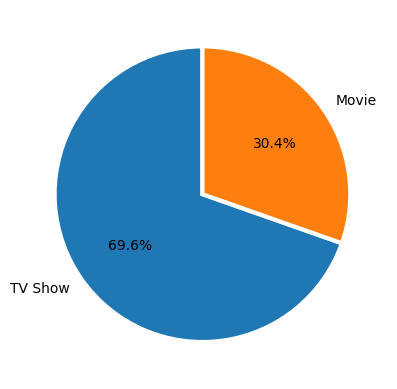

In [4]:
#Quería tener este grafico aquí aunque no me lo pidan
tipo= ["TV Show", "Movie"]
plt.pie(numero_tipos, labels= tipo, labeldistance=1.10, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, autopct= '%1.1f%%',  startangle= 90)

C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\3031436369.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "type" , data= netflix_concat, palette=["#33B5FF", "#FFBB33"])


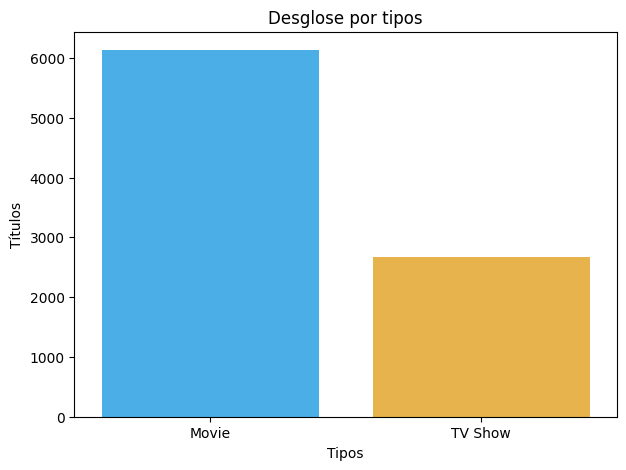

In [5]:
plt.figure(figsize= (7,5))
sns.countplot(x= "type" , data= netflix_concat, palette=["#33B5FF", "#FFBB33"])
plt.title("Desglose por tipos")
plt.xlabel("Tipos")
plt.ylabel("Títulos");

Gracias a este gráfico observamos que las producciones originales de netflix son principalmente del tipo Movie

#### Ejercicio 2: ¿Cuál es la distribución de calificaciones (rating) en los títulos? En esta gráfica deberás:

- Mostrar los resultados ordenados de mayor a menor. 

- Rotar las etiquetas del eje X. 

- Quitar el nombre del eje X. 

- Cambiar el nombre del ehje Y. 

- Ponerle título a la gráfica. 



In [6]:
ratings=netflix_concat["rating"].value_counts().index
ratings

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'],
      dtype='object', name='rating')

C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\120096686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "rating" , data= netflix_concat, order= ratings, palette= "mako")


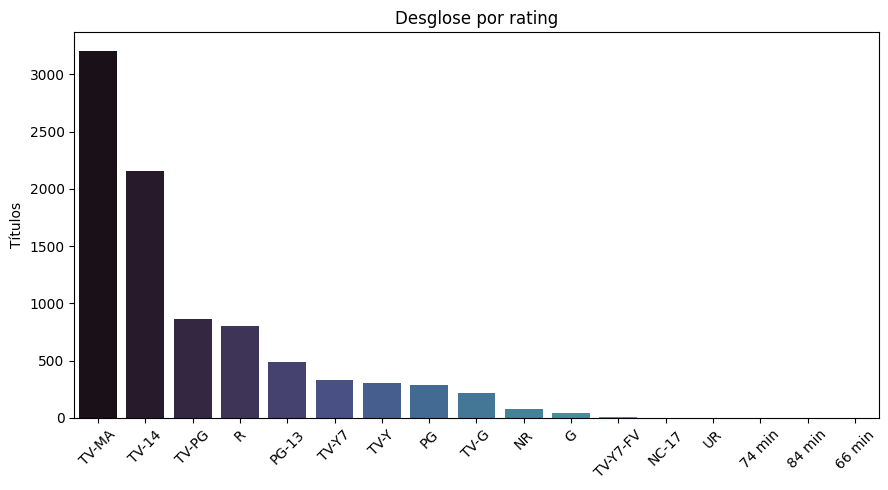

In [7]:
plt.figure(figsize= (9,5))
sns.countplot(x= "rating" , data= netflix_concat, order= ratings, palette= "mako")
plt.title("Desglose por rating")
plt.xlabel("")
plt.xticks(rotation=45)
plt.ylabel("Títulos")
plt.tight_layout();

Como observamos, el rating TV-MA (mayores de 17 años) y TV-14 (Mayores de 14) son los ratings por diferencia que más produce netflix 

#### Ejercicio 3: ¿Cuál es el top 10 de países con más títulos disponibles? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 



In [8]:
top= netflix_concat.groupby("country")["title"].count().sort_values()[-10:]
top10=top.reset_index()
top10

,country,title
0,Egypt,106
1,Mexico,110
2,France,124
3,Spain,145
4,Canada,181
5,South Korea,199
6,Japan,245
7,United Kingdom,419
8,India,972
9,United States,2818


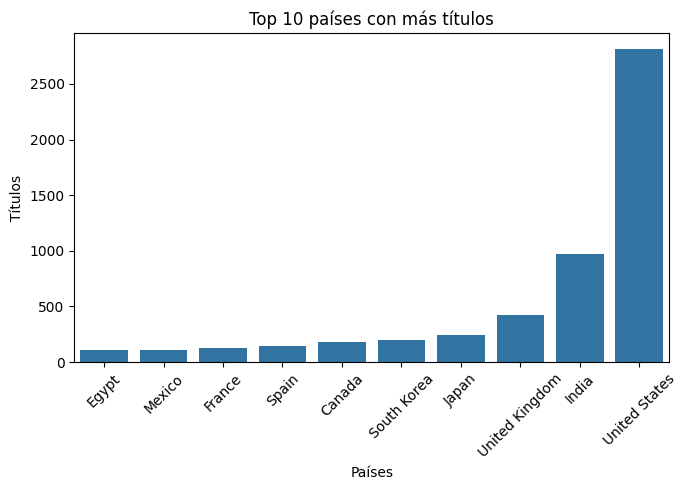

In [9]:

plt.figure(figsize=(7,5))
sns.barplot(x="country", y="title", data= top10)
plt.xlabel("Países")
plt.ylabel("Títulos")
plt.title("Top 10 países con más títulos")
plt.xticks(rotation= 45)
plt.tight_layout();


Podemos afirmar gracias a este gráfico que USA encabeza sin duda la lista de países con el mayor número de títulos ya que triplica al segundo de esta lista(India). Algo curioso es que casualmente los países representados en lo más altos justo reflejan los idiomas más hablados (Exceptuando el mandarín que no está en los datos).

#### Ejercicio 5: ¿Cuál es la puntuación promedio de las películas según su calificación? Deberás:


- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rotar las etiquetas del eje X. 

- Cambia el tamaño de la gráfica a 15 x 5

In [10]:
datos=round(netflix_concat.groupby("rating")["IMDB Score"].mean().drop_duplicates().dropna().reset_index(), 2)


C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\1502491182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "rating", y= "IMDB Score", data= datos, palette= "mako")


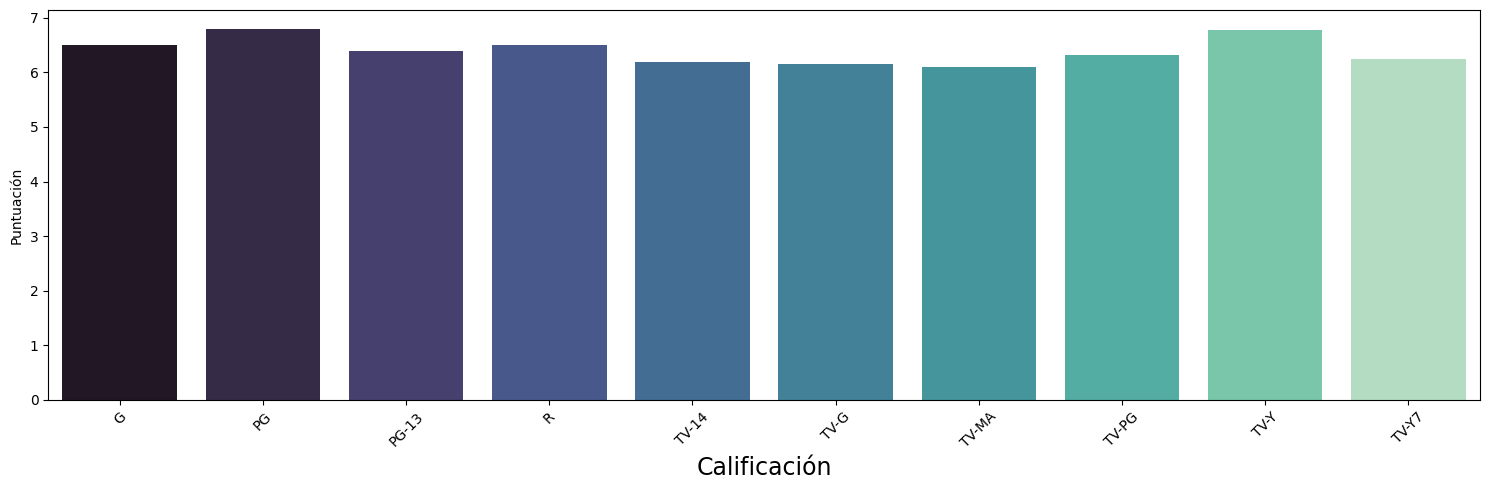

In [11]:
plt.figure(figsize= (15,5))
sns.barplot(x= "rating", y= "IMDB Score", data= datos, palette= "mako")
plt.xlabel("Calificación", fontsize= 17)
plt.ylabel("Puntuación")
plt.xticks(rotation= 45)
plt.tight_layout();


Observamos que en general las puntuaciones no varían exageradamente entre unos ratings y otros. Sin embargo, las mejores puntuaciones las tienen TV-Y(Para todos los públicos) y PG(Con supervisión de los padres)

#### Ejercicio 6: ¿Cuál es la relación entre la duración de las películas y su puntuación en IMDb? Deberás:

- Cambiar el tamaño de los puntos. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 


In [12]:
netflix_concat["Runtime"].dropna()

0        90.0
141     117.0
624      91.0
834      95.0
836     117.0
        ...  
5901     80.0
5906     84.0
5910     84.0
5912     83.0
5916     81.0
Name: Runtime, Length: 513, dtype: float64

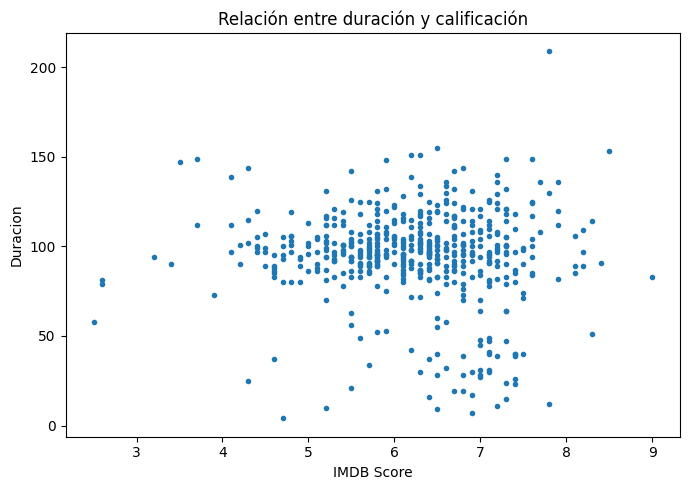

In [13]:

plt.figure(figsize= (7,5))
plt.scatter(x= "IMDB Score", y= "Runtime", data= netflix_concat, s=9)
plt.xlabel("IMDB Score")
plt.ylabel("Duracion")
plt.title("Relación entre duración y calificación")
plt.tight_layout();

De este gráfico extraemos que la mayoria de títulos duran entorno a los 100 minutos y que generalmente obtienen un Score de entre 5 y 8. No se observa ninguna relación clara entre ambas variables con lo que no podemos hablar de que la duración afecte realmente al Score.

#### Ejercicio 7: ¿Cómo se distribuye la puntuación en IMDb según los 10 idiomas más usados? Deberás:

- Usa una gráfica que nos muestre la mediana y los cuartiles. 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [14]:
top=netflix_concat["Language"].value_counts().nlargest(10).index
top10= netflix_concat[netflix_concat["Language"].isin(top)]


C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\3404046011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= "IMDB Score", y = "Language", data= top10, palette= 'viridis')


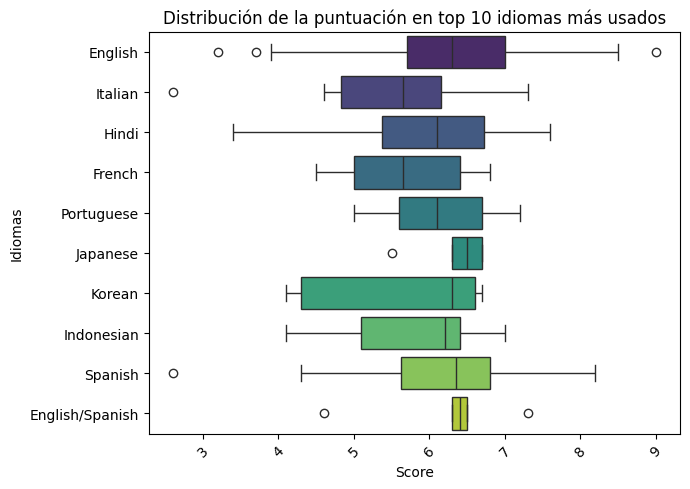

In [15]:
plt.figure(figsize= (7,5)) 
sns.boxplot(x= "IMDB Score", y = "Language", data= top10, palette= 'viridis')
plt.xlabel("Score")
plt.xticks(rotation= 45)
plt.ylabel("Idiomas")
plt.title("Distribución de la puntuación en top 10 idiomas más usados")
plt.tight_layout();


Al observar el gráfico concluimos que en varios casos no nos podemos fiar de la media por la exitencia de valores atípicos (English, Spanish etc), también observamos que quienes mejor suelen ser calificados son los títulos en japonés e inglés/español. También se observan casos como los del italiano en los que la mayoría de calificaciones son bajas ya que se cubre el 25% muy pronto (distancia ente el minimo de datos regulares y el cuartil 25).

#### Ejercicio 8: ¿Cuáles son los 10 directores que tienen las puntuaciones más altas?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Cambiar el tamaño de la gráfica. 



In [16]:
netflix_concat_drop= netflix_concat.dropna()

In [17]:
top10.head(1)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Dick Johnson Is Dead,Documentary,"October 2, 2020",90.0,7.5,English


In [18]:
top= netflix_concat_drop["director"].value_counts().nlargest(10).index
top10= netflix_concat_drop[netflix_concat_drop["director"].isin(top)]

C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\2197080697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= "director", y= "IMDB Score", data= top10, palette= "viridis")


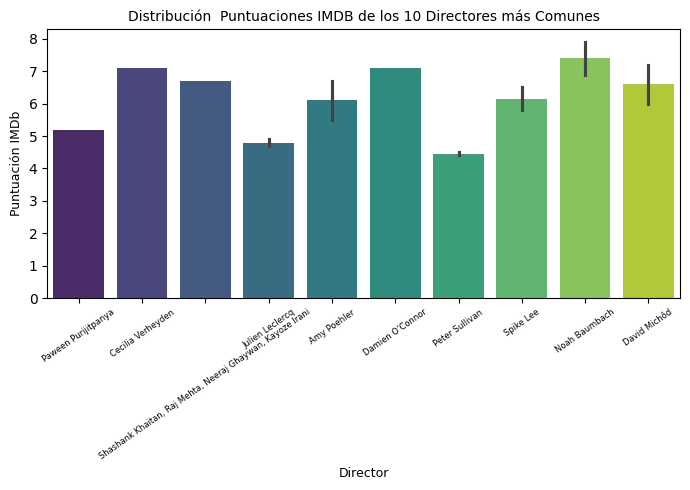

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize= (7,5))
sns.barplot(x= "director", y= "IMDB Score", data= top10, palette= "viridis")
plt.title('Distribución  Puntuaciones IMDB de los 10 Directores más Comunes', fontsize=10)
plt.xlabel('Director', fontsize=9)
plt.ylabel('Puntuación IMDb', fontsize=9)
plt.xticks(rotation=35, fontsize= 6)
plt.tight_layout()
plt.show()
plt.tight_layout();

Podemos afirmar con un 95% de confianza que las obras de Noah Baumbach son las mejores valoradas con una valoración media de entre [7-8]. Por otro lado también al mismo nivel de confianza, podemos decir que las obras de Peter Sullivan son las peores valoradas entre [4,2-4,9]

#### Ejercicio 9:  ¿Cuál es la distribución de títulos por tipo y calificación? Soluciona este ejercicio usando subplots. Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 


In [20]:
ratings=netflix_concat["rating"].value_counts().index
ratings

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '84 min', '66 min'],
      dtype='object', name='rating')

In [ ]:
fig, axes= plt.subplots(2,2,figsize= (7,5))       #Axes es como una lista de graficos por eso ponemos uno en el índice 0 el primer 2 es número de filas y el segundo de columnas
sns.countplot(x= "Attrition",hue= "OverTime", data= df, ax = axes[0][0]) 
sns.barplot(x= "Attrition",y= "MonthlyIncome",data= df,palette= "mako", ax= axes[0][1])

C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\2413997469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "type", data= netflix_concat, ax = axes[0], palette= "mako")
C:\Users\jaime\AppData\Local\Temp\ipykernel_27992\2413997469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= "rating" , data= netflix_concat, order= ratings, palette= "mako", ax= axes[1])


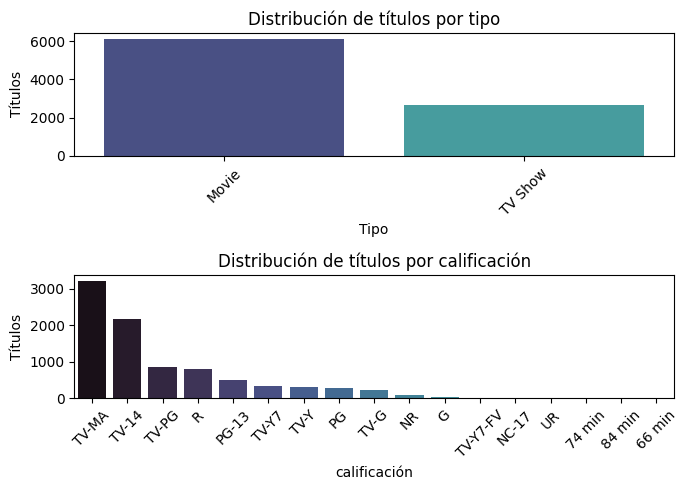

In [64]:
fig, axes= plt.subplots(2,1, figsize= (7,5), sharex= False)
sns.countplot(x= "type", data= netflix_concat, ax = axes[0], palette= "mako")
sns.countplot(x= "rating" , data= netflix_concat, order= ratings, palette= "mako", ax= axes[1])
axes[0].set_title("Distribución de títulos por tipo")
axes[0].set_xlabel("Tipo")
axes[0].set_ylabel("Títulos")
axes[0].tick_params(axis= "x", rotation= 45)
axes[1].tick_params(axis= "x", rotation= 45)
axes[1].set_ylabel("Títulos")
axes[1].set_xlabel("calificación")
axes[1].set_title("Distribución de títulos por calificación")
plt.tight_layout();


Las conclusiones de este son las mismas que en las que ya han salido (creo que esto no es lo que tenía que salir).

#### Ejercicio 10, tenemos que sacar el numero de pelis y series (el tipo) para los 6 principales paises, mostrando cada pais en un subplot. 



- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 



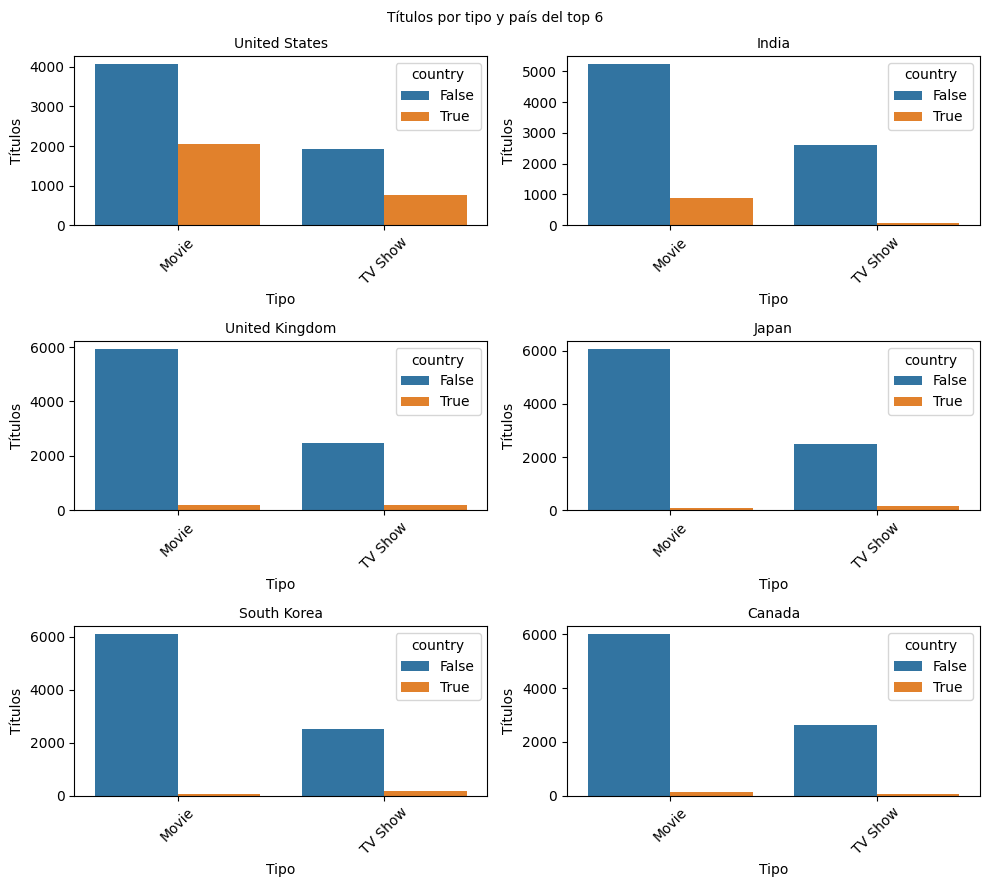

In [116]:
fig, axes= plt.subplots(3,2, figsize= (10,9), sharex= False)
sns.countplot(x= "type",hue= netflix_concat["country"]== "United States", data= netflix_concat, ax = axes[0][0]) 
sns.countplot(x= "type",hue= netflix_concat["country"]== "India", data= netflix_concat, ax = axes[0][1])
sns.countplot(x= "type",hue= netflix_concat["country"]== "United Kingdom", data= netflix_concat, ax = axes[1][0])
sns.countplot(x= "type",hue= netflix_concat["country"]== "Japan", data= netflix_concat, ax = axes[1][1])
sns.countplot(x= "type",hue= netflix_concat["country"]== "South Korea", data= netflix_concat, ax = axes[2][0])
sns.countplot(x= "type",hue= netflix_concat["country"]== "Canada", data= netflix_concat, ax = axes[2][1])
axes[0][0].set_title("United States", fontsize=10)
axes[0][1].set_title("India",fontsize=10)
axes[1][0].set_title("United Kingdom",fontsize=10)
axes[1][1].set_title("Japan",fontsize=10)
axes[2][0].set_title("South Korea",fontsize=10)
axes[2][1].set_title("Canada",fontsize=10)

axes[0][0].tick_params(axis= "x", rotation= 45)
axes[0][1].tick_params(axis= "x", rotation= 45)
axes[1][0].tick_params(axis= "x", rotation= 45)
axes[1][1].tick_params(axis= "x", rotation= 45)
axes[2][0].tick_params(axis= "x", rotation= 45)
axes[2][1].tick_params(axis= "x", rotation= 45)

axes[0][0].set_xlabel("Tipo")
axes[0][0].set_ylabel("Títulos")
axes[0][1].set_xlabel("Tipo")
axes[0][1].set_ylabel("Títulos")
axes[1][0].set_xlabel("Tipo")
axes[1][0].set_ylabel("Títulos")
axes[1][1].set_xlabel("Tipo")
axes[1][1].set_ylabel("Títulos")
axes[2][0].set_xlabel("Tipo")
axes[2][0].set_ylabel("Títulos")
axes[2][1].set_xlabel("Tipo")
axes[2][1].set_ylabel("Títulos")


plt.suptitle("Títulos por tipo y país del top 6",fontsize=10)
plt.tight_layout();

Como era de esperar los tipos más habityales son movies salvo en korea del sur

#### Ejercicio 11: ¿Cuál es total de tipos de calificaciones, considerando solo los principales 5 países? Deberás:

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

In [104]:
top= netflix_concat_drop["country"].value_counts().nlargest(5).index
top10= netflix_concat_drop[netflix_concat_drop["country"].isin(top)]
netflix_concat.groupby()


<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

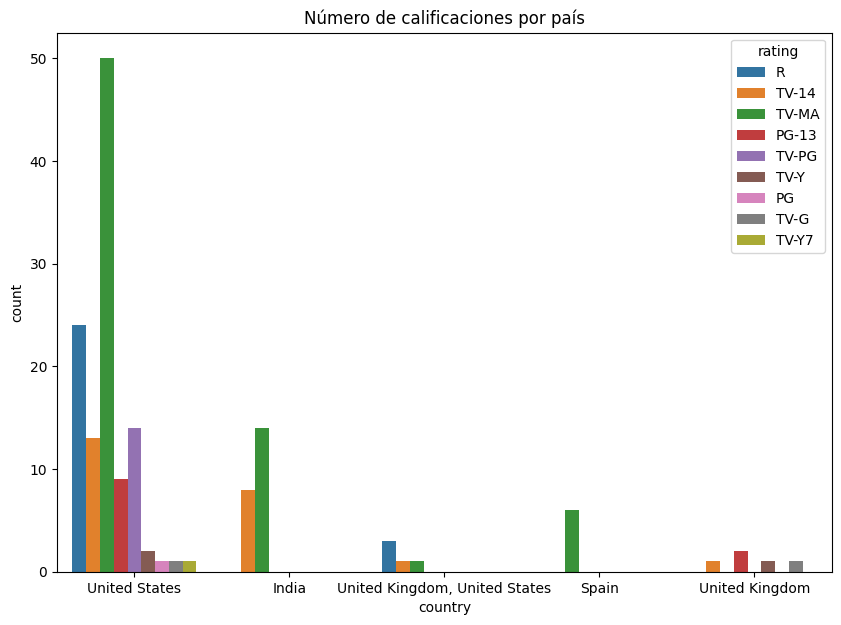

In [114]:
plt.figure(figsize= (10,7))
sns.countplot(x= "country", hue= "rating", data= top10)
plt.title("Número de calificaciones por país")
plt.xlabel

In [119]:
netflix_concat.columns

Index(['Unnamed: 0', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score',
       'Language'],
      dtype='object')

#### Ejercicio 12: ¿Cómo se distribuyen las 5 primeras calificaciones  a lo largo de los aúltimo 10 años? 

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

In [135]:
ultimos10= netflix_concat[netflix_concat['release_year'] >= (netflix_concat['release_year'].max() - 10)]
top = ultimos10['rating'].value_counts().nlargest(5).index
top5 = ultimos10[ultimos10['rating'].isin(top)]

In [136]:
df_pivot = top5.pivot_table(index='release_year', columns='rating', aggfunc='size', fill_value=0)
df_pivot

rating,R,TV-14,TV-MA,TV-PG,TV-Y
release_year,,,,,
2011,20,55,27,18,8
2012,29,73,54,23,8
2013,41,75,64,29,5
2014,49,99,79,47,14
2015,67,144,184,63,20
2016,86,218,341,97,31
2017,73,251,451,111,31
2018,52,268,549,105,41
2019,39,252,500,98,50


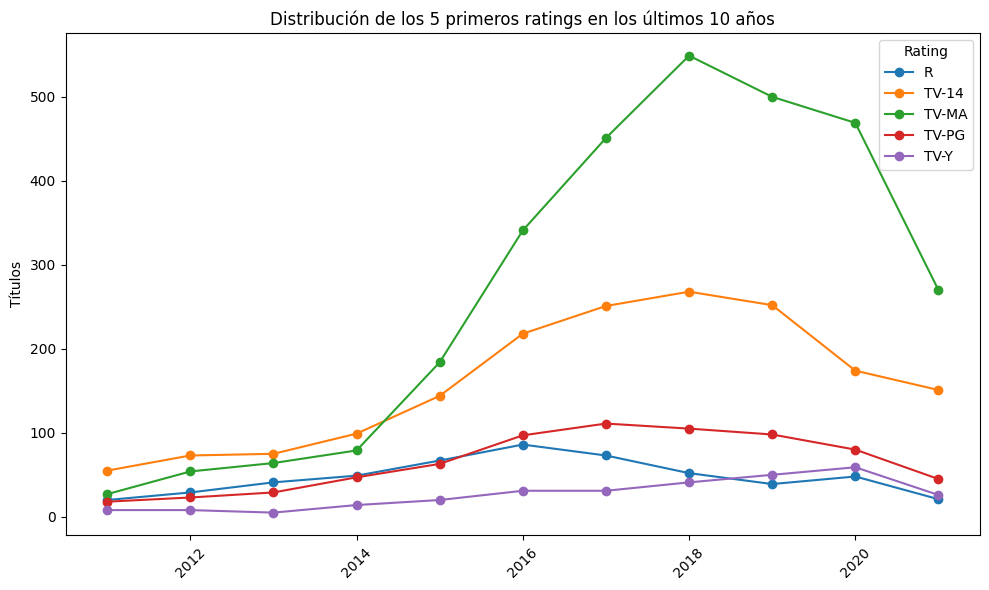

In [138]:
plt.figure(figsize=(10, 6))
for rating in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[rating], marker='o', label=rating)  #Esto y lo de la pivot me lo ha sacado chat porque me estaba faltando ese paso
plt.title('Distribución de los 5 primeros ratings en los últimos 10 años') #Va graficando cada iterable de la pivot
plt.xlabel('') 
plt.legend(title='Rating')             #Esto sirve para sacar la leyenda
plt.ylabel('Títulos')
plt.xticks(rotation=45)
plt.tight_layout();




### BONUS

#### Ejercicio 13: ¿Cómo ha evolucionado la cantidad de títulos añadidos a lo largo de los años diferenciando entre Películas y Series?

- Poner nombre a la ejes. 

- Poner título a la gráfica. 

- Rota las etiquetas del eje X. 

- Elimina el nombre del eje X. 

- Añade una *grid* al gráfico. 

#### Ejercicio 14: ¿Cómo se distribuyen los títulos según su calificación (rating)? Utiliza un gráfico de “quesitos” para visualizar la proporción de títulos en cada categoría de calificación.

#### Ejercicio 15: ¿Cómo se distribuyen los títulos según su calificación (rating) y tipo (Películas vs Series)? Utiliza un gráfico countplot con el parámetro hue para diferenciar entre películas y series en cada calificación.